In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
loan_df=pd.read_csv(r"C:\Users\Harshal\Downloads\train_ctrUa4K.csv")

In [4]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
#loan_df.drop(['Loan_ID',],axis=1,inplace=True)

In [6]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
cat=loan_df.select_dtypes(include='object').columns
num=loan_df.select_dtypes(exclude='object').columns

In [8]:
for column in loan_df.columns:
    if loan_df[column].dtype == 'object':  # Categorical columns
        mode = loan_df[column].mode()[0]
        loan_df[column].fillna(mode, inplace=True)
    else:                                 # Numeric columns
        median = loan_df[column].median()
        loan_df[column].fillna(median, inplace=True)


C:\Users\Harshal\AppData\Local\Temp\ipykernel_3300\2627071063.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df[column].fillna(mode, inplace=True)
C:\Users\Harshal\AppData\Local\Temp\ipykernel_3300\2627071063.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [9]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
keys=loan_df['Gender'].value_counts().keys()
valus=loan_df['Gender'].value_counts().values
keys

Index(['Male', 'Female'], dtype='object', name='Gender')

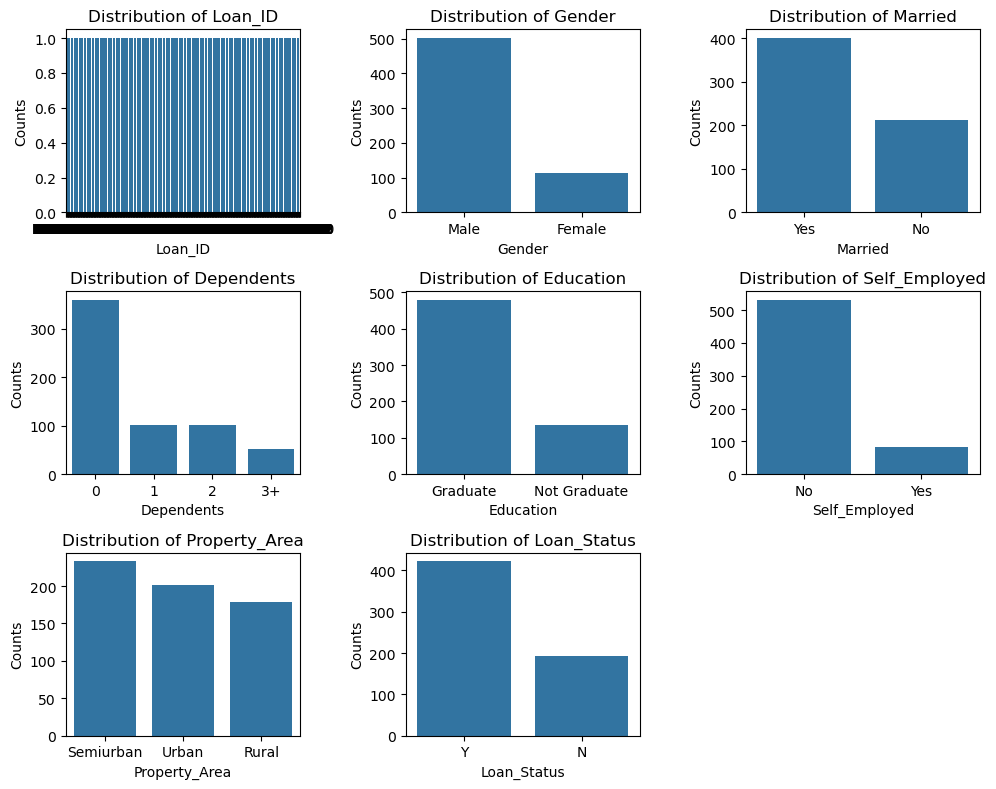

In [11]:
plt.figure(figsize=(10,8))  
for i, column in enumerate(cat):
    key = loan_df[column].value_counts().keys() 
    plt.subplot(3,3, i + 1)  
    sns.countplot(data=loan_df, x=column, order=key)  
    plt.title(f'Distribution of {column}')  
    plt.xlabel(column)
    plt.ylabel('Counts')
plt.tight_layout()
plt.show()  


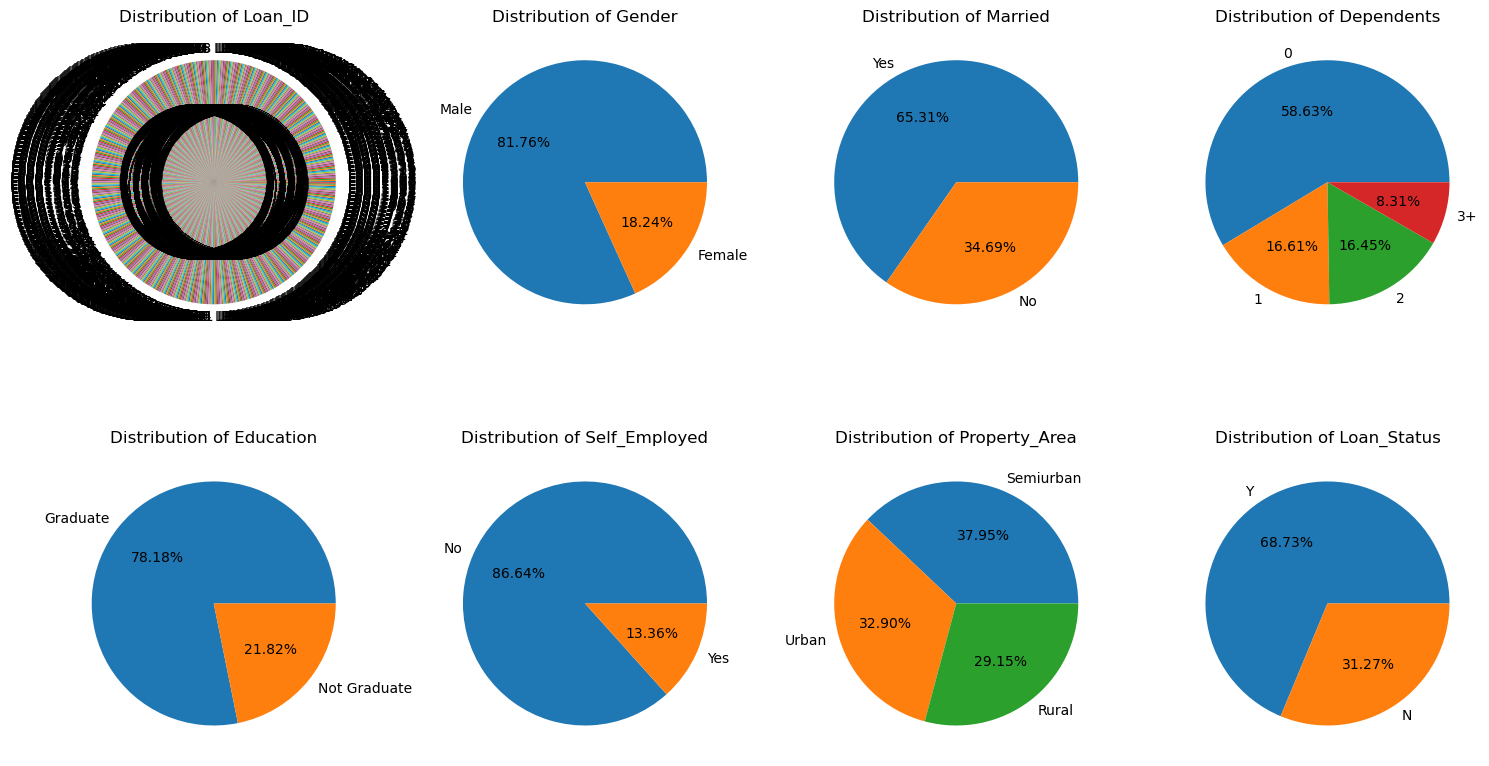

In [12]:
plt.figure(figsize=(15, 12))  
for i, column in enumerate(cat):
    key = loan_df[column].value_counts() 
    plt.subplot(2, 4, i + 1) 
    lables=key.index
    plt.pie(key, labels=lables, autopct="%0.2f%%")  
    plt.title(f'Distribution of {column}')  
    plt.tight_layout() 
plt.show() 

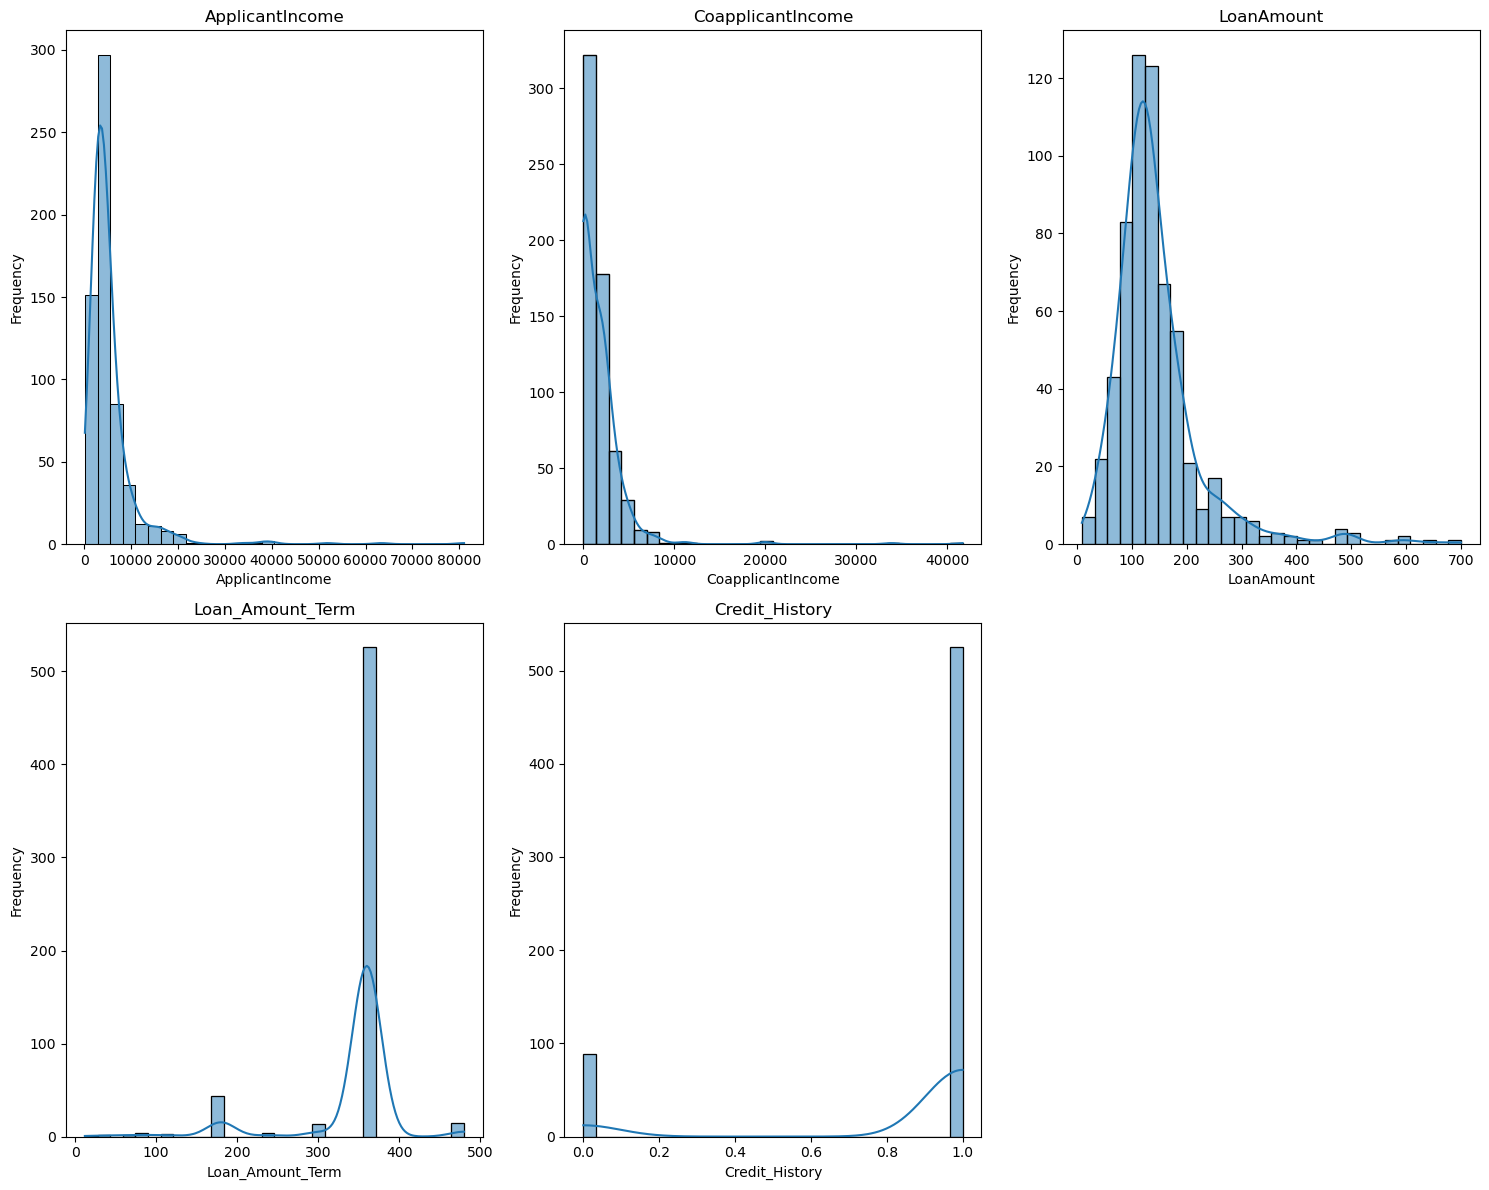

In [13]:
plt.figure(figsize=(15, 12))
for i in range(len(num)):
    plt.subplot(2, 3, i + 1)  
    sns.histplot(loan_df[num[i]], bins=30, kde=True)  
    plt.title(num[i])  
    plt.xlabel(num[i])  
    plt.ylabel('Frequency')
    plt.tight_layout()  
plt.show() 

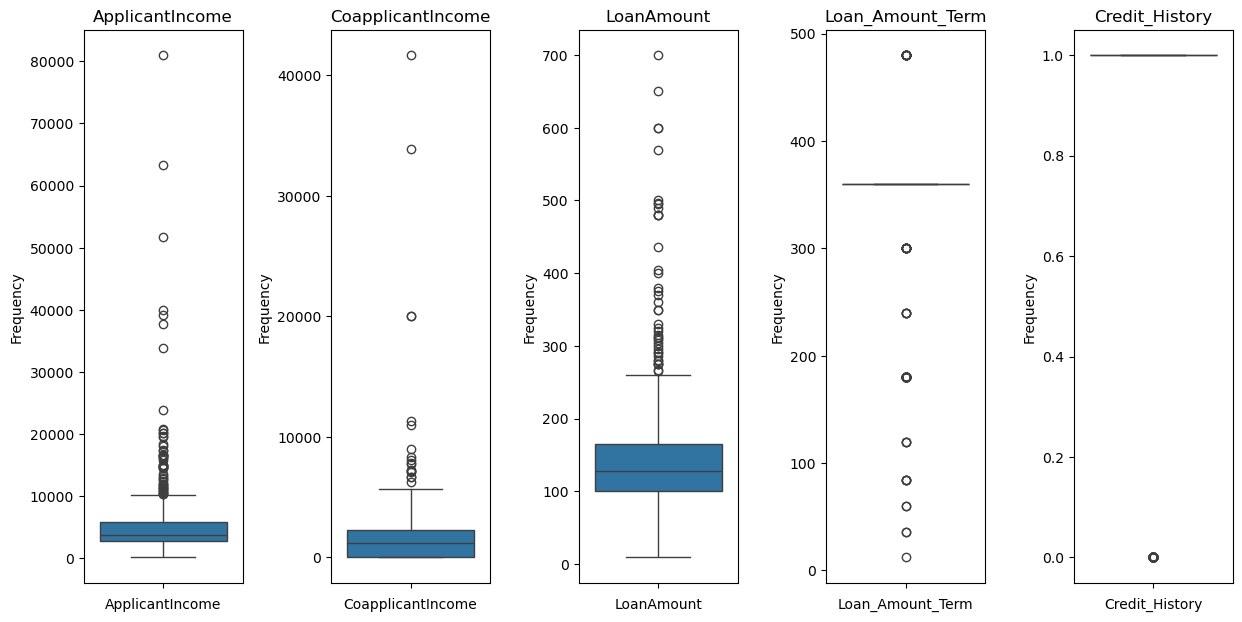

In [14]:
plt.figure(figsize=(15, 12))
for i in range(len(num)):
    plt.subplot(2, 6, i + 1)  
    sns.boxplot(loan_df[num[i]])  
    plt.title(num[i])  
    plt.xlabel(num[i])  
    plt.ylabel('Frequency')
    plt.tight_layout()  
plt.show() 

<Axes: >

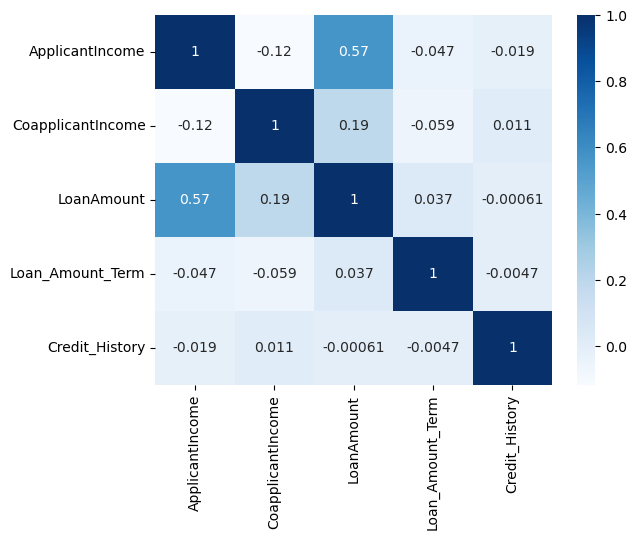

In [15]:
corr=loan_df.corr(numeric_only=True)
sns.heatmap(corr ,annot=True,cmap='Blues')

In [16]:
for column in num:
    if column in loan_df.columns:
        present_data=loan_df[column]
        q1 = round(np.quantile(present_data, 0.25), 2)
        q3 = round(np.quantile(present_data, 0.75), 2)
        iqr=q3-q1
        lb=q1-1.5*iqr
        ub=q3-1.5*iqr
        median=present_data.median()
        data=[]
        for i in present_data:
            if i<lb and i<ub:
                data.append(median)
            else:
                data.append(i)
loan_df['pwage']=data

loan_df['pwage']    

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    1.0
Name: pwage, Length: 614, dtype: float64

In [17]:
le=LabelEncoder()
for i in cat[1:]:
    loan_df[i]=le.fit_transform(loan_df[i])


In [18]:
ss=StandardScaler()
ss.fit_transform(loan_df[num])

array([[ 0.07299082, -0.55448733, -0.21124125,  0.2732313 ,  0.41173269],
       [-0.13441195, -0.03873155, -0.21124125,  0.2732313 ,  0.41173269],
       [-0.39374734, -0.55448733, -0.94899647,  0.2732313 ,  0.41173269],
       ...,
       [ 0.43717437, -0.47240418,  1.27616847,  0.2732313 ,  0.41173269],
       [ 0.35706382, -0.55448733,  0.49081614,  0.2732313 ,  0.41173269],
       [-0.13441195, -0.55448733, -0.15174486,  0.2732313 , -2.42876026]])

In [19]:
zz=loan_df[num]
mean=zz.mean()
std=zz.std()
dataZ=(zz-mean)/std
dataZ

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072931,-0.554036,-0.211069,0.273009,0.411397
1,-0.134302,-0.038700,-0.211069,0.273009,0.411397
2,-0.393427,-0.554036,-0.948223,0.273009,0.411397
3,-0.461686,0.251774,-0.306186,0.273009,0.411397
4,0.097649,-0.554036,-0.056505,0.273009,0.411397
...,...,...,...,...,...
609,-0.409796,-0.554036,-0.888775,0.273009,0.411397
610,-0.212383,-0.554036,-1.257353,-2.520780,0.411397
611,0.436818,-0.472019,1.275129,0.273009,0.411397
612,0.356773,-0.554036,0.490416,0.273009,0.411397


In [21]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,pwage
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,1.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1.0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,1.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,1.0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,1.0
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,1.0
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,1.0
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,1.0


In [23]:
loan_df_selected.to_csv('selected_loan_data1.csv')